Top 3 Restaurants based on Delivery Time :

Doordash : 
- doordash/doordash_top_3_pizza.json
- doordash/doordash_top_3_sushi.json
- doordash/doordash_top_3_burger.json

UberEats :
- Uber Eats/top_3_pizza.json
- Uber Eats/top_3_sushi.json
- Uber Eats/top_3_burgers.json

GrubHub :
- grubhub/fastest_delivery_pizza.json
- grubhub/fastest_delivery_sushi.json
- grubhub/fastest_delivery_burger.json

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dish = input("Choose from 3 dishes - pizza, burger, sushi: ").strip().lower()

valid_dishes = ["pizza", "burger", "sushi"]
if dish not in valid_dishes:
    print("Invalid choice. Please choose from pizza, burger, or sushi.")
else:
    file_path1 = f"doordash/doordash_top_3_{dish}.json"
    file_path2 = f"Uber Eats/top_3_{dish}.json"
    file_path3 = f"grubhub/fastest_delivery_{dish}.json"

    try:
        # Doordash
        with open(file_path1, "r", encoding="utf-8") as file:
            data1 = json.load(file)
        top_ratings1 = data1.get("top_delivery_time", [])
        df_doordash = pd.DataFrame(top_ratings1)

        # UberEats
        with open(file_path2, "r", encoding="utf-8") as file:
            data2 = json.load(file)
        top_ratings2 = data2.get("top_3_by_delivery_time", [])
        df_ubereats = pd.DataFrame(top_ratings2)

        # GrubHub
        with open(file_path3, "r", encoding="utf-8") as file:
            data3 = json.load(file)
        top_ratings3 = data3.get("top_5_fastest_delivery_restaurants", [])[0:3]
        df_grubhub = pd.DataFrame(top_ratings3)

        # Print confirmation
        print(f"Data loaded successfully for {dish} from all sources!")

    except FileNotFoundError as e:
        print(f"Error: {e}. Please ensure the correct files exist.")


Data loaded successfully for pizza from all sources!


In [3]:
df_doordash['delivery_time'] = df_doordash['delivery_time'].str.replace(' min', '').astype(int)
df_doordash['distance'] = df_doordash['distance'].str.replace(' mi', '', regex=False)
df_doordash['platform'] = 'Doordash'

print(df_doordash)

  restaurant_id  restaurant_name        type ratings no_of_ratings distance  \
0        720446       McDonald's  Restaurant     4.5          20k+      2.3   
1       1206749  Jack in the Box  Restaurant     4.1           9k+      0.7   
2        362381      Burger King  Restaurant     4.4          10k+      1.7   

   delivery_time                                                URL menu  \
0             19  https://www.doordash.com/store/720446?cursor=e...   []   
1             19  https://www.doordash.com/store/1206749?cursor=...   []   
2             20  https://www.doordash.com/store/362381?cursor=e...   []   

   platform  
0  Doordash  
1  Doordash  
2  Doordash  


In [4]:
df_ubereats['distance'] = np.nan
df_ubereats['platform'] = 'UberEats'

print(df_ubereats)

                            name  \
0  Buffalo Pizza & Ice Cream Co.   
1                  Noah's Bagels   
2                         Panera   

                                                link  rating reviews location  \
0  https://www.ubereats.com/store/buffalo-pizza-%...     4.7  (250+)      N/A   
1  https://www.ubereats.com/store/noahs-bagels-da...     4.2    (93)      N/A   
2  https://www.ubereats.com/store/panera-609-3rd-...     4.6  (800+)      N/A   

      delivery_fee  delivery_time  \
0  $0 delivery fee             10   
1  $0 delivery fee             15   
2  $0 delivery fee             45   

                                 categories and menu  distance  platform  
0  [Pizza, American, Italian, Group Friendly, Bre...       NaN  UberEats  
1  [American, Coffee and Tea, Sandwich, Bagels, B...       NaN  UberEats  
2  [Breakfast and Brunch, salad, Sandwich, Family...       NaN  UberEats  


In [5]:
def extract_avg_time(time_estimate):
    if isinstance(time_estimate, dict) and "min" in time_estimate and "max" in time_estimate:
        return int(round((time_estimate["min"] + time_estimate["max"]) / 2))
    return time_estimate

df_grubhub["delivery_time"] = df_grubhub["delivery_time_estimate"].apply(extract_avg_time)
df_grubhub['platform'] = 'GrubHub'

print(df_grubhub)

  restaurant_id                   name  pickup_available  delivery_available  \
0       5887960  Mountain Mike's Pizza             False                True   
1       2856353          Calzone  Life             False                True   
2       2054645           Panera Bread             False                True   

   rating  coupons_available  accepts_credit  accepts_cash  \
0     4.2              False           False         False   
1     4.5              False           False         False   
2     4.5              False           False         False   

  distance_from_location  delivery_time_estimate  \
0                   1.17  {'min': 20, 'max': 35}   
1                   1.56  {'min': 20, 'max': 35}   
2                   1.23  {'min': 20, 'max': 35}   

                                            cuisines  avg_delivery_time  \
0       [Pizza, American, Salads, Sandwiches, Wings]               27.5   
1                 [Pizza, Calzones, Dessert, Salads]               27.5

In [6]:
df_doordash = df_doordash.rename(columns={
    "restaurant_name": "restaurant_name",
    "ratings": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_ubereats = df_ubereats.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_grubhub = df_grubhub.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance_from_location": "distance(mi)"
})

df_doordash_renamed = df_doordash[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_ubereats_renamed = df_ubereats[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_grubhub_renamed = df_grubhub[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]

combined_results = pd.concat([df_doordash_renamed, df_ubereats_renamed, df_grubhub_renamed], ignore_index=True)

print(combined_results)

                 restaurant_name ratings  delivery_time(min) distance(mi)  \
0                     McDonald's     4.5                  19          2.3   
1                Jack in the Box     4.1                  19          0.7   
2                    Burger King     4.4                  20          1.7   
3  Buffalo Pizza & Ice Cream Co.     4.7                  10          NaN   
4                  Noah's Bagels     4.2                  15          NaN   
5                         Panera     4.6                  45          NaN   
6          Mountain Mike's Pizza     4.2                  28         1.17   
7                  Calzone  Life     4.5                  28         1.56   
8                   Panera Bread     4.5                  28         1.23   

   platform  
0  Doordash  
1  Doordash  
2  Doordash  
3  UberEats  
4  UberEats  
5  UberEats  
6   GrubHub  
7   GrubHub  
8   GrubHub  


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94667/3866083078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="platform", y="delivery_time(min)", data=df, palette="Set2")


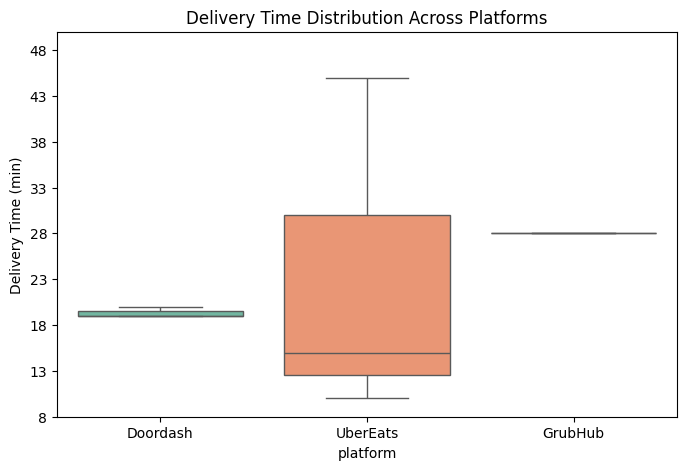

In [ ]:
# Visualizations

df = combined_results

plt.figure(figsize=(8, 5))
sns.boxplot(x="platform", y="delivery_time(min)", data=df, palette="Set2")
plt.title("Delivery Time Distribution Across Platforms")
plt.ylim(8, 50) 
plt.yticks(range(8, 50, 5))
plt.ylabel("Delivery Time (min)")
plt.show()

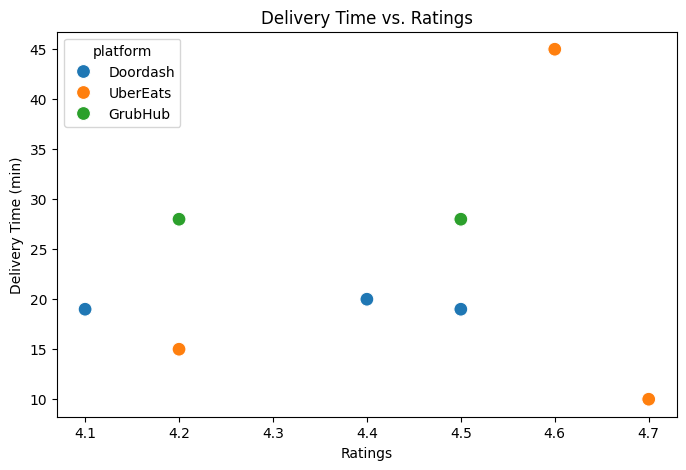

In [19]:
# Delivery Time vs. Ratings

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")
df["delivery_time(min)"] = pd.to_numeric(df["delivery_time(min)"], errors="coerce")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="ratings", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Delivery Time vs. Ratings")
plt.xlabel("Ratings")
plt.ylabel("Delivery Time (min)")
plt.show()


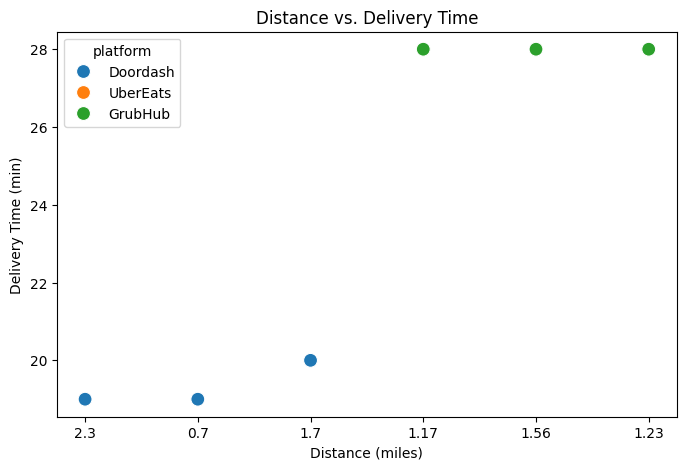

In [20]:
# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x="distance(mi)", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (miles)")
plt.ylabel("Delivery Time (min)")
plt.show()


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94667/705086415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette="coolwarm")


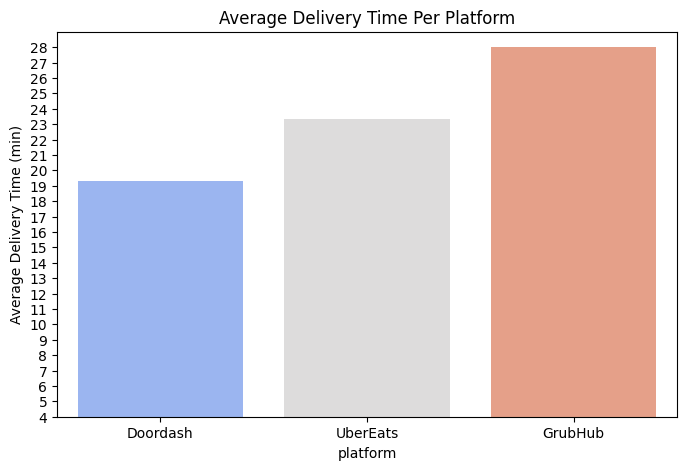

In [22]:
# Average Delivery Time Per Platform

plt.figure(figsize=(8, 5))
avg_delivery_time = df.groupby("platform")["delivery_time(min)"].mean().sort_values()
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette="coolwarm")
plt.yticks(np.arange(4.0, avg_delivery_time.max() + 1, 1))  # Adjusted y-axis scale for better readability
plt.title("Average Delivery Time Per Platform")
plt.ylabel("Average Delivery Time (min)")
plt.ylim(4.0, avg_delivery_time.max() + 1)
plt.show()


In [26]:
# combined_results['delivery_time(min)'] = combined_results['delivery_time(min)'].astype(float)

min_time = combined_results['delivery_time(min)'].min()

fastest_delivery_restaurants = combined_results[combined_results['delivery_time(min)'] == min_time]

fastest_delivery_restaurants_sorted = fastest_delivery_restaurants.sort_values(by=['distance(mi)', 'ratings'], 
                                                                    ascending=[False, True])

fastest_restaurant = fastest_delivery_restaurants_sorted.iloc[0]

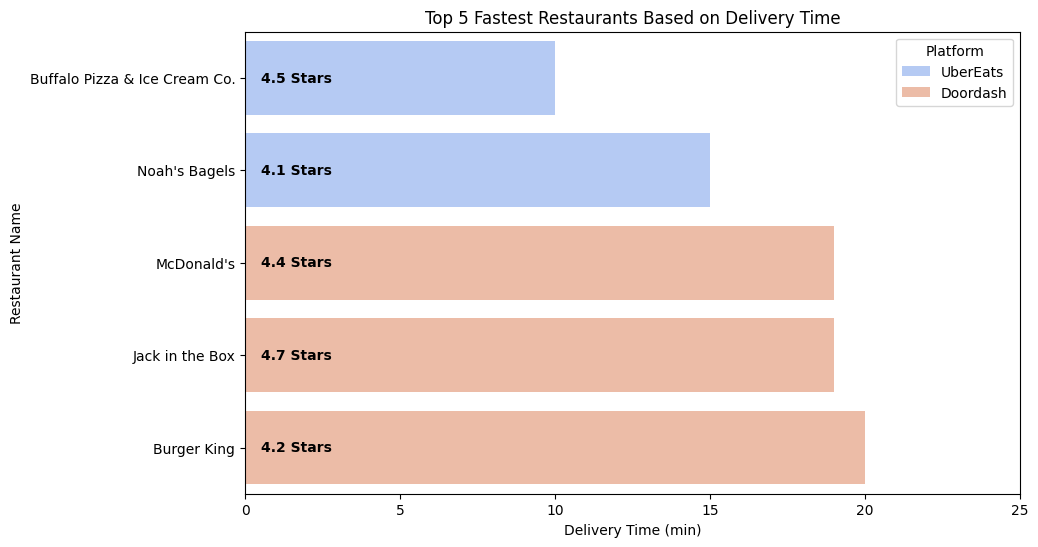

In [31]:
# Top 5 Restaurants Based on Delivery Time

top_5 = df.nsmallest(5, "delivery_time(min)")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="delivery_time(min)", y="restaurant_name", hue="platform", data=top_5, palette="coolwarm", dodge=False)

for i, row in top_5.iterrows():
    ax.text(0.5, i, f"{row['ratings']} Stars", va='center', ha='left', fontsize=10, color='black', weight='bold')

plt.xlabel("Delivery Time (min)")
plt.ylabel("Restaurant Name")
plt.title("Top 5 Fastest Restaurants Based on Delivery Time")
plt.xlim(0, top_5["delivery_time(min)"].max() + 5)

plt.legend(title="Platform")
plt.show()

In [27]:
print("Best restaurant to order", dish, "in terms of Fastest Delivery is \"", fastest_restaurant['restaurant_name'], "\" \n")
print("Platform to order from :", fastest_restaurant['platform'])
print("Ratings :", fastest_restaurant['ratings'])
print("Delivery Time :", fastest_restaurant['delivery_time(min)'])
print("Distance in Miles :", fastest_restaurant['distance(mi)'])

Best restaurant to order pizza in terms of Fastest Delivery is " Buffalo Pizza & Ice Cream Co. " 

Platform to order from : UberEats
Ratings : 4.7
Delivery Time : 10.0
Distance in Miles : nan
